In [1]:
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
from scipy.integrate import ode, solve_ivp
sys.path.append('../')
sys.path.append('../Lib')
sys.path.append('../Protocols')
from pacing_protocol import PacingProtocol
import mod_protocols
sys.path.append('../models')
from Models.br1977 import BR1977

In [3]:
import simulator_scipy
'''
Beeler and Reuter 1977
'''
model = BR1977()
sim_bdf = simulator_scipy.Simulator(model)

start_time = time.time()
sim_bdf.pre_simulate( pre_step=5000 )                 
print("Pre-simulation has been completed.")
print("--- %s seconds ---"%(time.time()-start_time))

Pre-simulation has been completed.
--- 0.016007423400878906 seconds ---


In [4]:
'''
Simulation with BDF
'''
end_time = 500

simulated_models_BDF = []

start_time = time.time()

model.protocol = PacingProtocol(level=1, start=100, length=2, period=1000, multiplier=0, default_time_unit='ms')
t_span = (0, end_time)
#     t_eval = np.linspace(0, t_span[1], 5000)  
sim_bdf.simulate(t_span=t_span, method='BDF', max_step=1, atol=1E-6, rtol=1E-3)       
simulated_models_BDF.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.27085041999816895 seconds ---


In [5]:
import simulator_euler
'''
Simulation with Euler
'''
sim_euler = simulator_euler.Simulator(model)
simulated_models_Euler = []

start_time = time.time()

model.protocol = PacingProtocol(level=1, start=100, length=2, period=1000, multiplier=0, default_time_unit='ms')

sim_euler.dt = 0.02 
sim_euler.simulate(end_time=end_time)      
simulated_models_Euler.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 2.0868117809295654 seconds ---


In [6]:
import simulator_myokit
'''
Simulation with Myokit
'''
model_path = "../mmt-model-files/br-1977.mmt" 

sim_myokit = simulator_myokit.Simulator(model_path, pre_sim=1) 
sim_myokit.name = "br1977"
times = np.linspace(0, end_time, 5000)
sim_myokit.bcl = 1000

simulated_models_myokit = []

start_time = time.time()

d = sim_myokit.simulate(times)
simulated_models_myokit.append(d)

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.06694769859313965 seconds ---


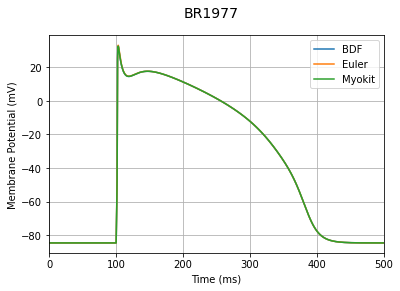

In [7]:
'''
Plot
'''
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle(model.name, fontsize=14)

bdf = simulated_models_BDF[0]
euler = simulated_models_Euler[0]
myokit = simulated_models_myokit[0]

# ax.set_title('Simulation %d'%(simulationNo))
ax.set_xlim(bdf.times.min(), bdf.times.max())
# ax.set_ylim(ylim[0], ylim[1])
ax.set_ylabel('Membrane Potential (mV)')  
ax.set_xlabel('Time (ms)')       

ax.plot(bdf.times, bdf.V, label='BDF')   
ax.plot(euler.times, euler.V, label='Euler')   
ax.plot( myokit['engine.time'], myokit['membrane.V'], label='Myokit') 
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
#             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
ax.grid()

#     print(bdf.V)
#     print(euler.V)
#     print("-"*100)
    
plt.show()
fig.savefig(os.path.join('Results', "BR1977-all"), dpi=100)

In [8]:
print("Complete")

Complete
